In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

import matplotlib.pyplot as plt

from torchvision import datasets, transforms

print(torch.__version__)
print(torch.cuda.is_available())

1.6.0
True


# Hyper parameters

In [2]:
NOISE_DIM = 2
IMG_SIZE = 28*28
LEARNING_RATE = 1e-3
MOMENTUM = 0.9
EPOCHS = 200
BATCH_SIZE = 64

In [3]:
USE_GPU = True

dtype = torch.float32

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
    Tensor = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')
    Tensor = torch.FloatTensor
    
print('using device', device)
print()

using device cuda



## Data

#### pytorch를 사용하는 김에 load도pytorch로

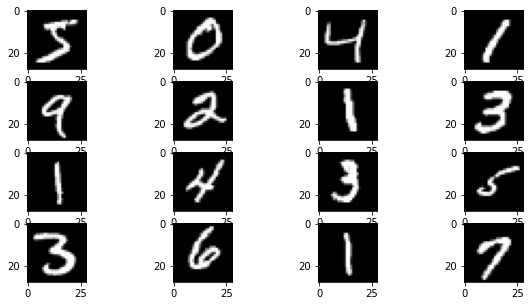

In [4]:
# transforms.Compose : 데이터를 전처리하는 패키지.

train_dataset = datasets.MNIST('../mnist_data/',
                             download=True,
                             train=True,
                             transform=transforms.Compose([
                                 transforms.ToTensor(), # image to Tensor
                                 #transforms.Normalize((0.1307,), (0.3081,)) # image, label
                             ]))

train_images = train_dataset.data

fig = plt.figure(figsize=(10,5))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(np.squeeze(train_images[i]), cmap='gray')
plt.show()

### normalize data

In [5]:
train_images = (train_images - 127.5)/127.5

## Noise

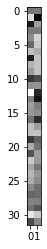

In [6]:
def create_noise(batch_size, noise_dim):
#     return np.random.uniform(low=-1, high=1, size=(batch_size, noise_dim))
    return np.random.normal(size=(batch_size, noise_dim))

noise = create_noise(32,2)
plt.imshow(noise, cmap='gray')
plt.show()

# Model

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class Generator(nn.Module):
    def __init__(self, noise_size, hidden_size, output_size):
        super().__init__()
        
        self.d1 = nn.Linear(noise_size, hidden_size)
        self.d2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.d1(x)
        out = F.relu(out)
        out = self.d2(out)
        return out
    
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super().__init__()
        
        self.flatten = nn.Flatten()
        self.d1 = nn.Linear(input_size, hidden_size1)
        self.d2 = nn.Linear(hidden_size1, hidden_size2)
        self.d3 = nn.Linear(hidden_size2, output_size)
    
    def forward(self, x, training=True):
        out = self.flatten(x)
        out = self.d1(out)
        out = F.dropout(out, training=training)
        out = F.relu(out)
        
        out = self.d2(out)
        out = F.dropout(out, training=training)
        out = F.relu(out)
        
        out = self.d3(out)
        out = torch.sigmoid(out)
        return out 

G = Generator(NOISE_DIM,256,IMG_SIZE).to(device=device)
D = Discriminator(IMG_SIZE, 256, 128, 1).to(device=device)

## Loss

In [9]:
binary_cross_entropy = nn.BCELoss().to(device=device)

## Optimizer

In [10]:
G_optimizer = torch.optim.SGD(G.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
D_optimizer = torch.optim.SGD(D.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

## Train

In [11]:
def train(G,D, train_ds, EPOCHS,
          BATCH_SIZE=64,
          NOISE_DIM=2,
          show=True):
    
    IMG_SIZE = 28*28
    
    batch_iters = train_ds.shape[0]//BATCH_SIZE
    
    if show:
        test_noise = Tensor(create_noise(1,NOISE_DIM))
    
    D_loss_history=[]
    G_loss_history=[]
    
    print('train start')
    for epoch in range(EPOCHS):
        for batch in range(batch_iters):
            noises = Tensor(create_noise(BATCH_SIZE, NOISE_DIM))
            real_img = train_ds[batch*BATCH_SIZE: (batch+1)*BATCH_SIZE].to(device=device)
            
            # D
            D_optimizer.zero_grad()
    
            fake_img = G(noises)
            fake_loss = binary_cross_entropy(D(fake_img), torch.zeros((BATCH_SIZE,1)).to(device=device))
            real_loss = binary_cross_entropy(D(real_img), torch.ones((BATCH_SIZE,1)).to(device=device))
            d_loss = (real_loss + fake_loss)/2
            
            d_loss.backward()
            D_optimizer.step()
            
            # G
            G_optimizer.zero_grad()
            
            fake_img = G(noises)
            
            g_loss = binary_cross_entropy(D(fake_img), torch.ones((BATCH_SIZE,1)).to(device=device))
            g_loss.backward()
            G_optimizer.step()
            
            # history of loss
            D_loss_history.append(d_loss)
            G_loss_history.append(g_loss)
        
        if show:
            print('epoch : {}'.format(epoch+1))
            test_img = G.forward(test_noise.detach())
            test_img = test_img[0].reshape(28,28)
            plt.imshow(test_img.detach().cpu().numpy(),cmap='gray')
            plt.show()
            
    return D_loss_history, G_loss_history

train start
epoch : 1


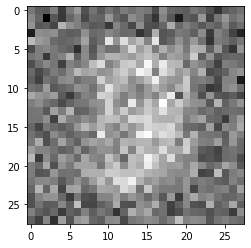

epoch : 2


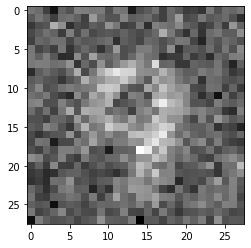

epoch : 3


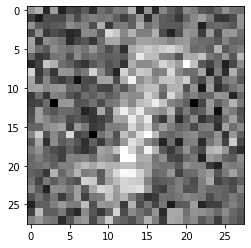

epoch : 4


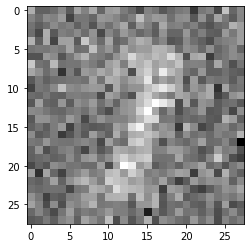

epoch : 5


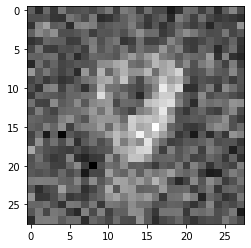

epoch : 6


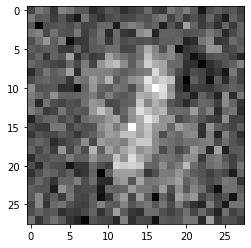

epoch : 7


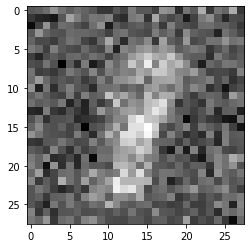

epoch : 8


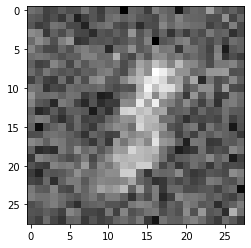

epoch : 9


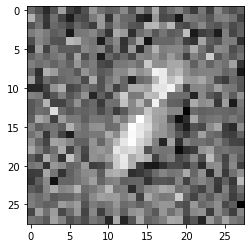

epoch : 10


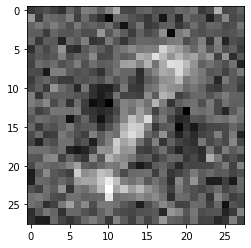

epoch : 11


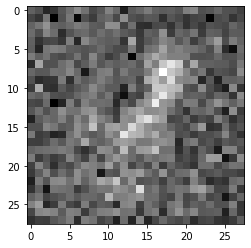

epoch : 12


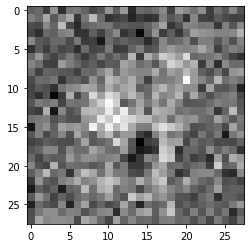

epoch : 13


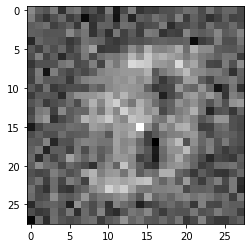

epoch : 14


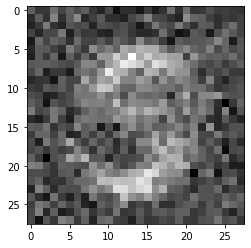

epoch : 15


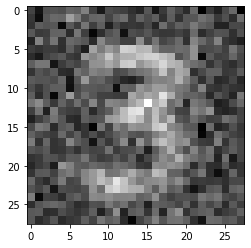

epoch : 16


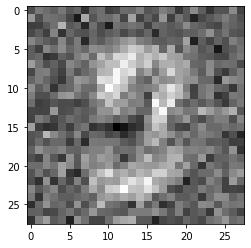

epoch : 17


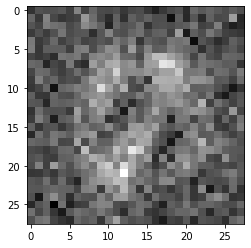

epoch : 18


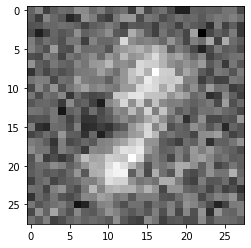

epoch : 19


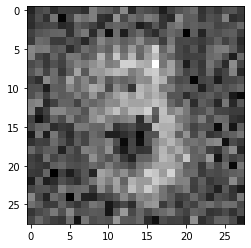

epoch : 20


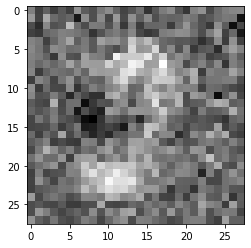

epoch : 21


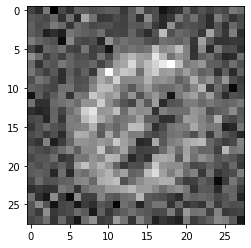

epoch : 22


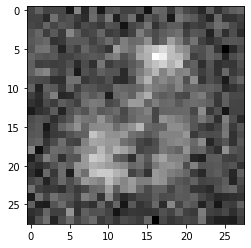

epoch : 23


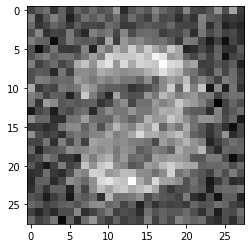

epoch : 24


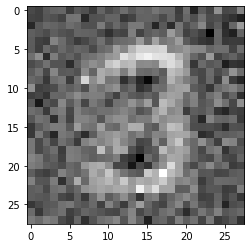

epoch : 25


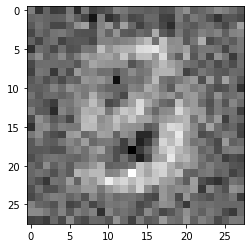

epoch : 26


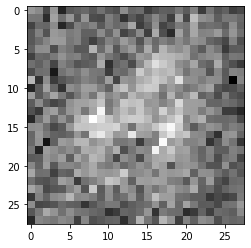

epoch : 27


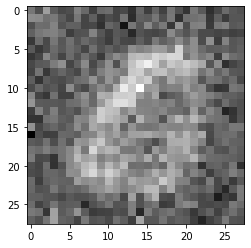

epoch : 28


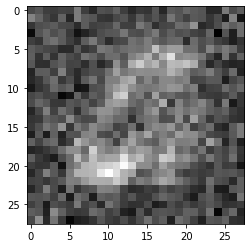

epoch : 29


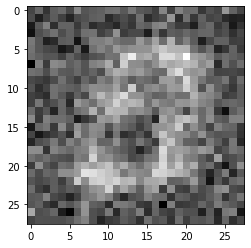

epoch : 30


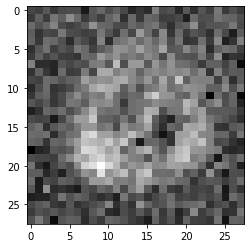

epoch : 31


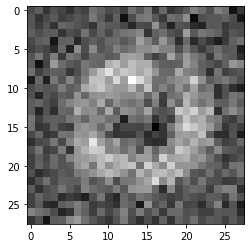

epoch : 32


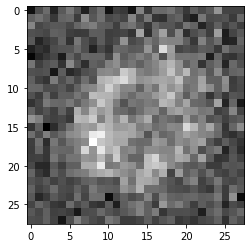

epoch : 33


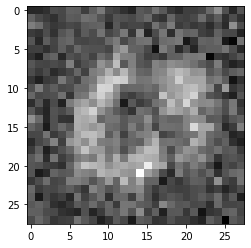

epoch : 34


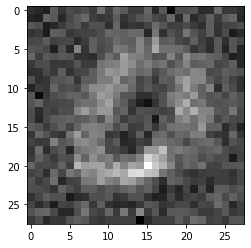

epoch : 35


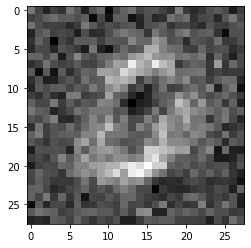

epoch : 36


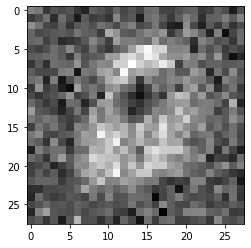

epoch : 37


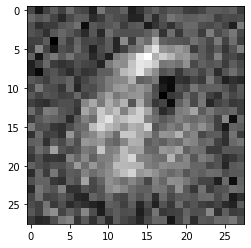

epoch : 38


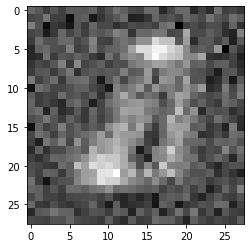

epoch : 39


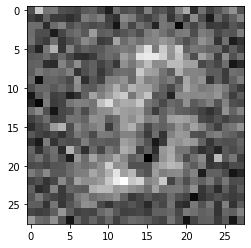

epoch : 40


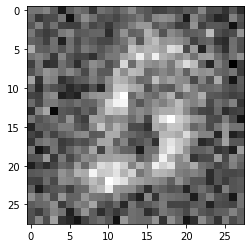

epoch : 41


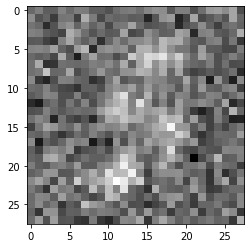

epoch : 42


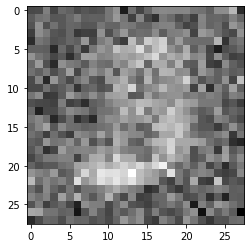

epoch : 43


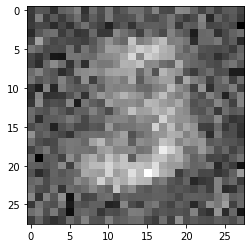

epoch : 44


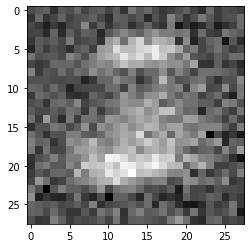

epoch : 45


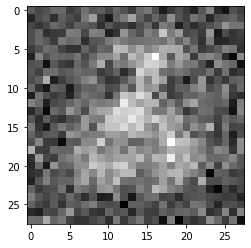

epoch : 46


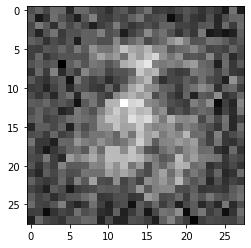

epoch : 47


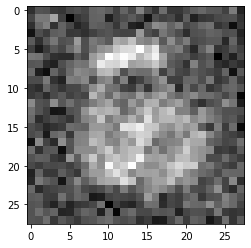

epoch : 48


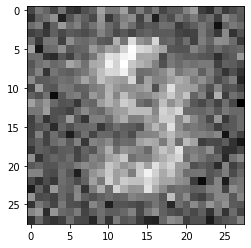

epoch : 49


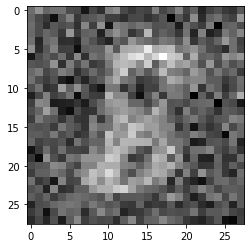

epoch : 50


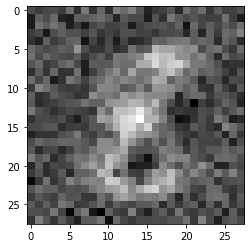

epoch : 51


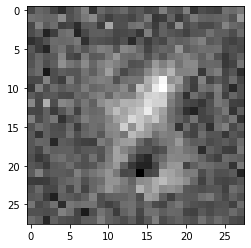

epoch : 52


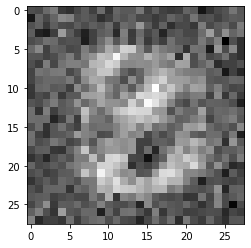

epoch : 53


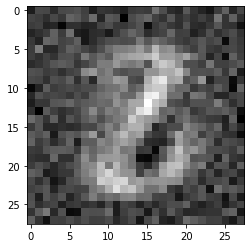

epoch : 54


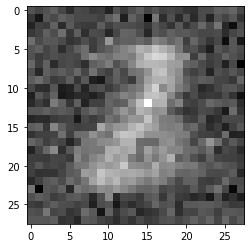

epoch : 55


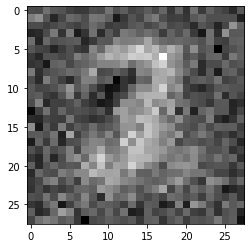

epoch : 56


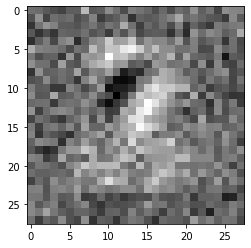

epoch : 57


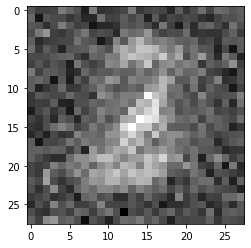

epoch : 58


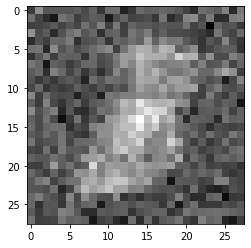

epoch : 59


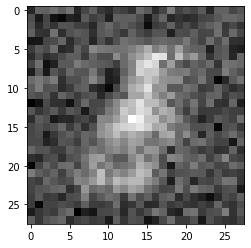

epoch : 60


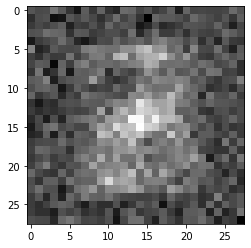

epoch : 61


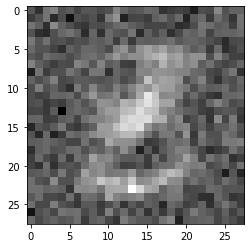

epoch : 62


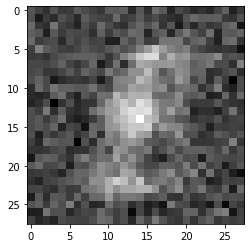

epoch : 63


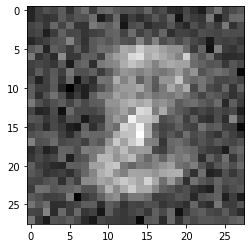

epoch : 64


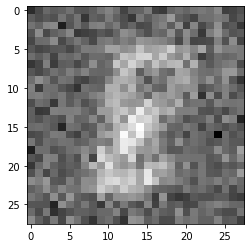

epoch : 65


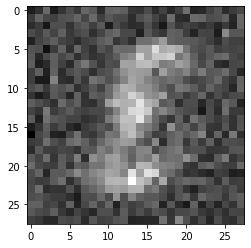

epoch : 66


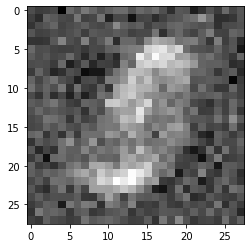

epoch : 67


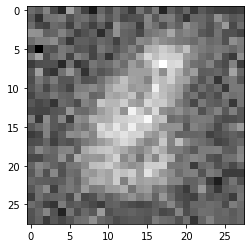

epoch : 68


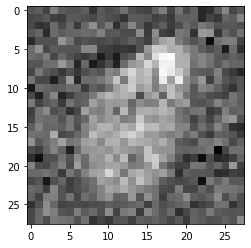

epoch : 69


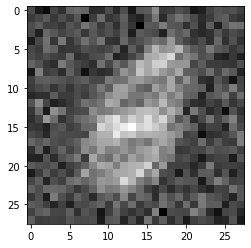

epoch : 70


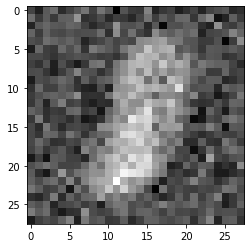

epoch : 71


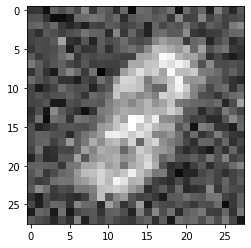

epoch : 72


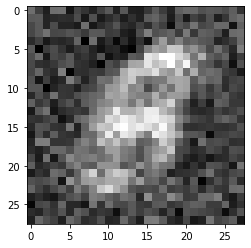

epoch : 73


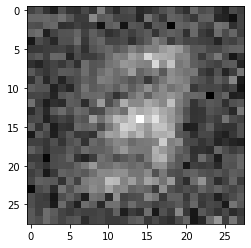

epoch : 74


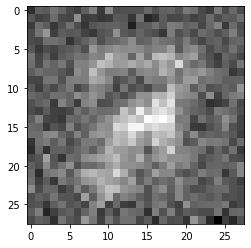

epoch : 75


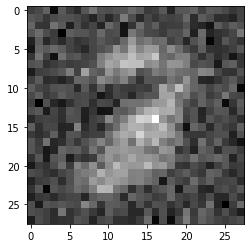

epoch : 76


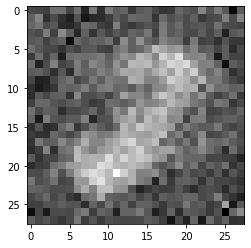

epoch : 77


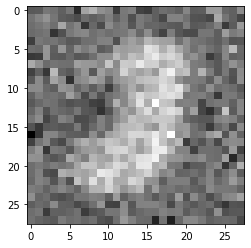

epoch : 78


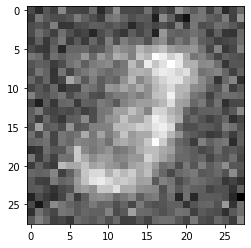

epoch : 79


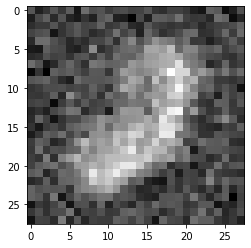

epoch : 80


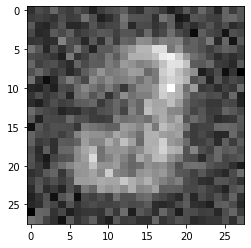

epoch : 81


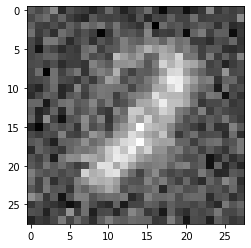

epoch : 82


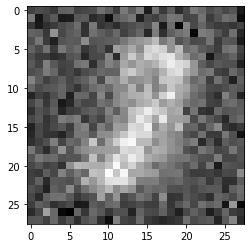

epoch : 83


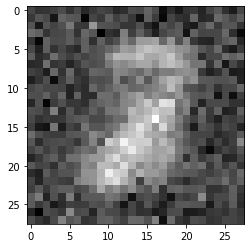

epoch : 84


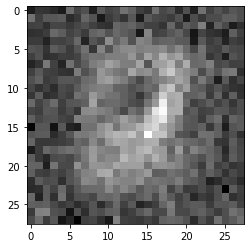

epoch : 85


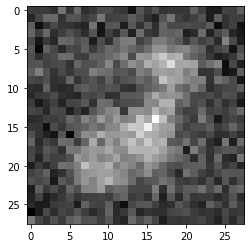

epoch : 86


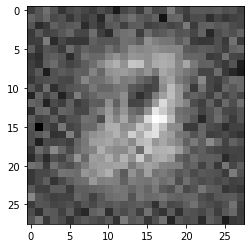

epoch : 87


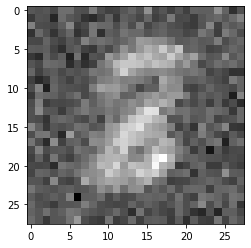

epoch : 88


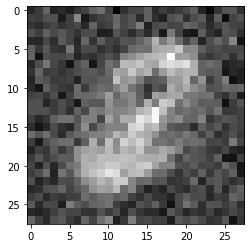

epoch : 89


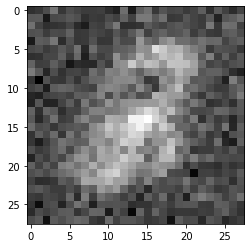

epoch : 90


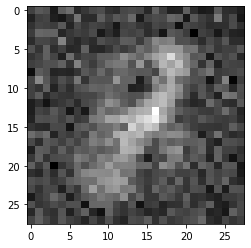

epoch : 91


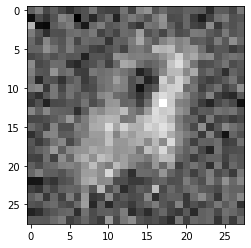

epoch : 92


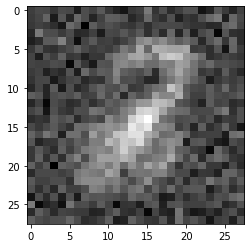

epoch : 93


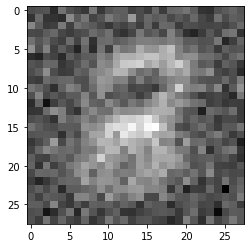

epoch : 94


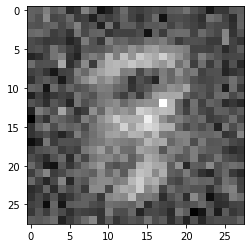

epoch : 95


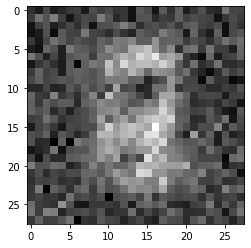

epoch : 96


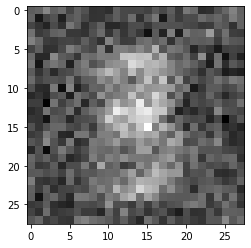

epoch : 97


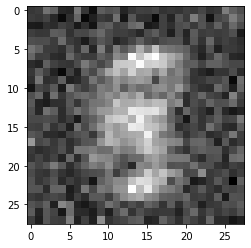

epoch : 98


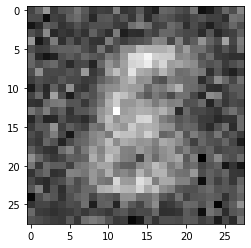

epoch : 99


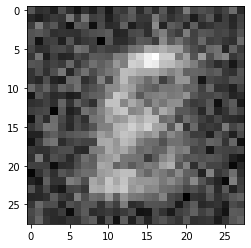

epoch : 100


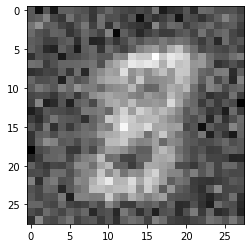

epoch : 101


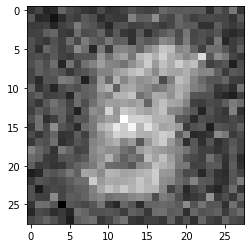

epoch : 102


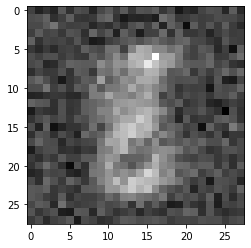

epoch : 103


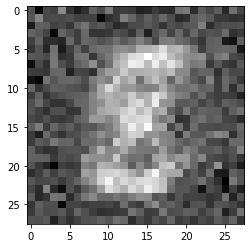

epoch : 104


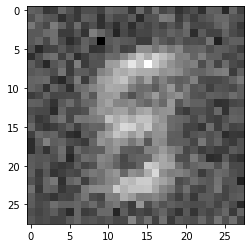

epoch : 105


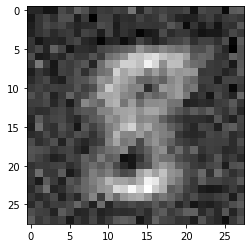

epoch : 106


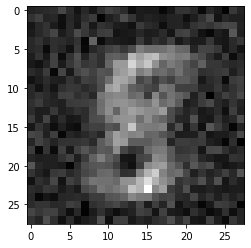

epoch : 107


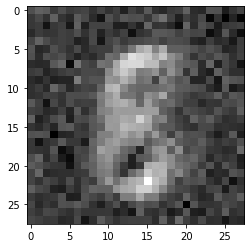

epoch : 108


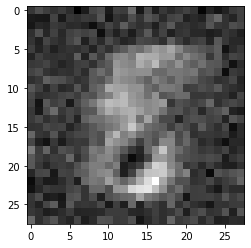

epoch : 109


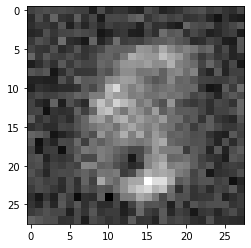

epoch : 110


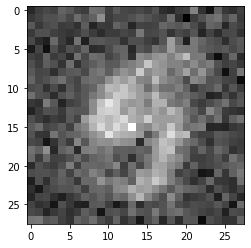

epoch : 111


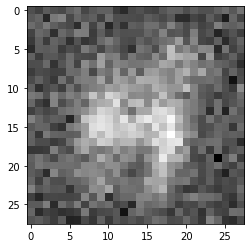

epoch : 112


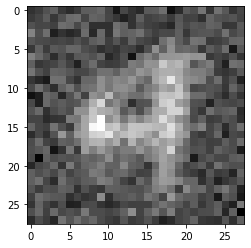

epoch : 113


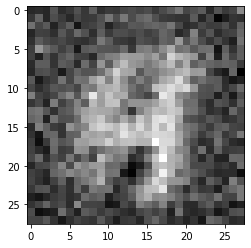

epoch : 114


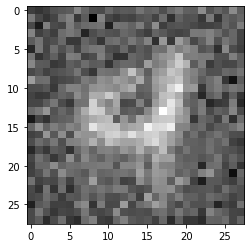

epoch : 115


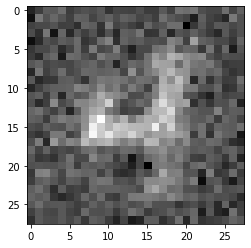

epoch : 116


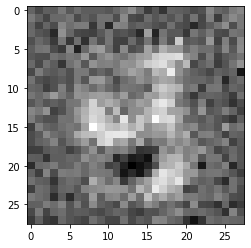

epoch : 117


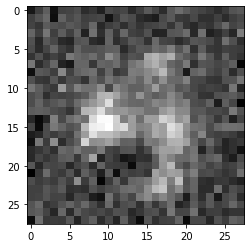

epoch : 118


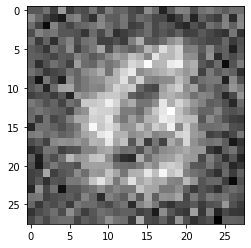

epoch : 119


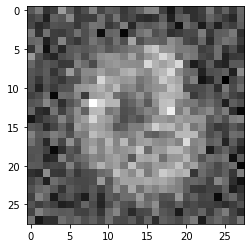

epoch : 120


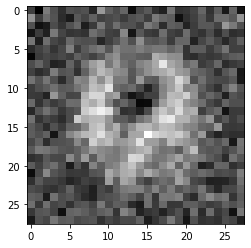

epoch : 121


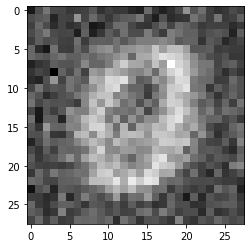

epoch : 122


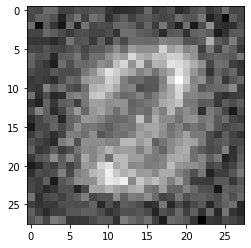

epoch : 123


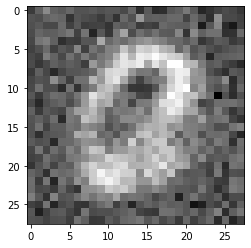

epoch : 124


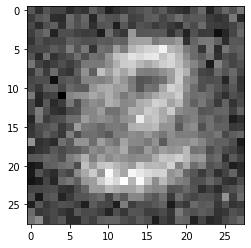

epoch : 125


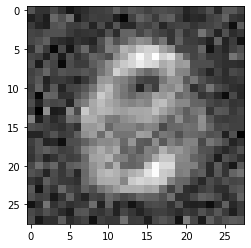

epoch : 126


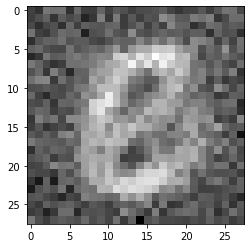

epoch : 127


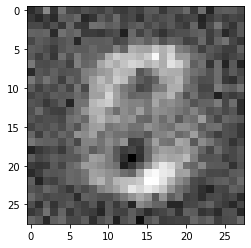

epoch : 128


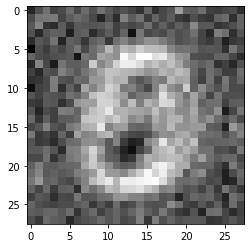

epoch : 129


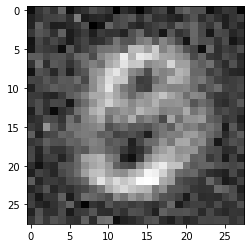

epoch : 130


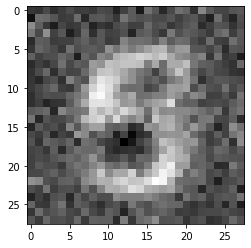

epoch : 131


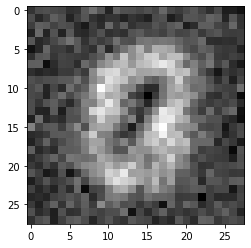

epoch : 132


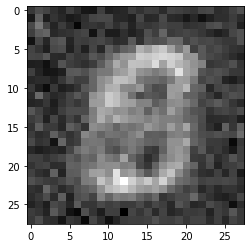

epoch : 133


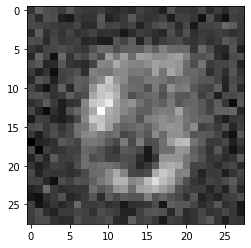

epoch : 134


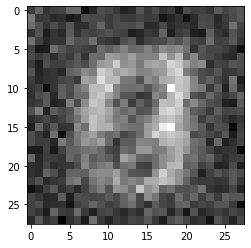

epoch : 135


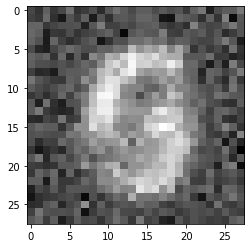

epoch : 136


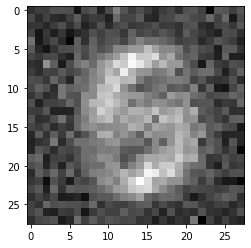

epoch : 137


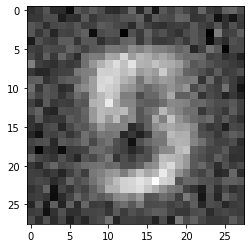

epoch : 138


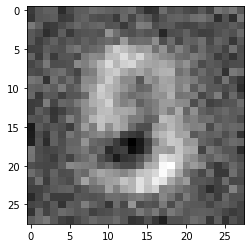

epoch : 139


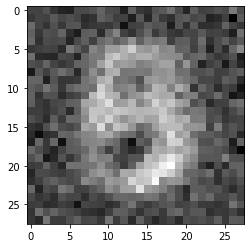

epoch : 140


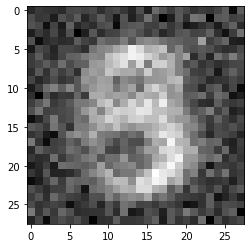

epoch : 141


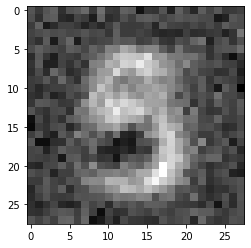

epoch : 142


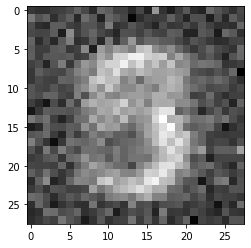

epoch : 143


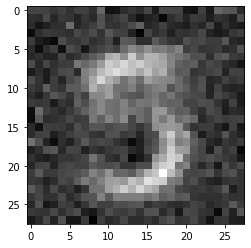

epoch : 144


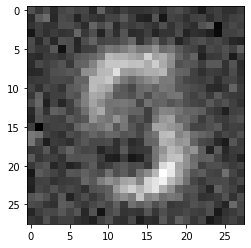

epoch : 145


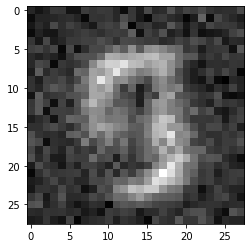

epoch : 146


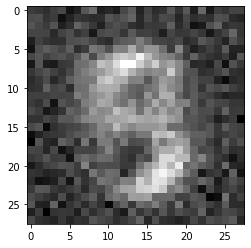

epoch : 147


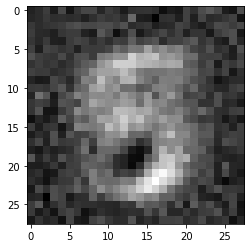

epoch : 148


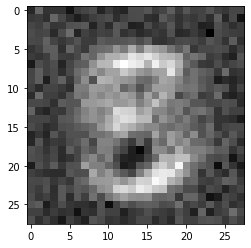

epoch : 149


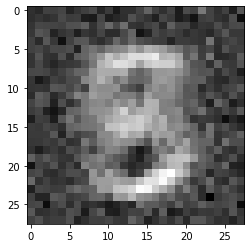

epoch : 150


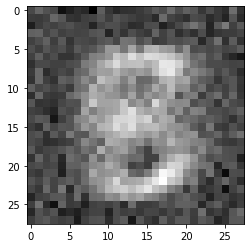

epoch : 151


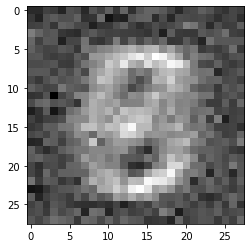

epoch : 152


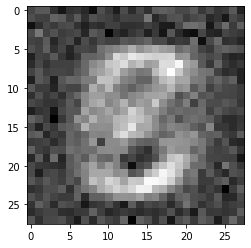

epoch : 153


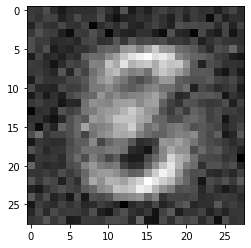

epoch : 154


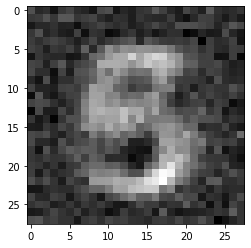

epoch : 155


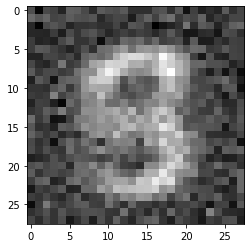

epoch : 156


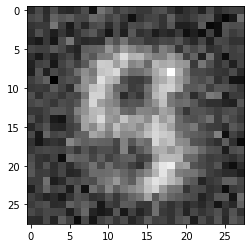

epoch : 157


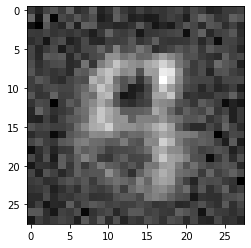

epoch : 158


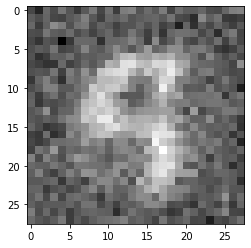

epoch : 159


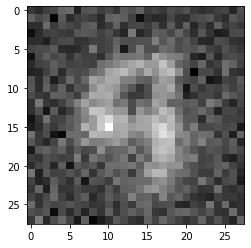

epoch : 160


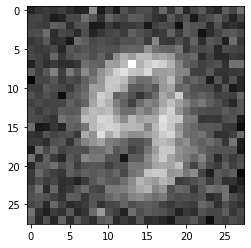

epoch : 161


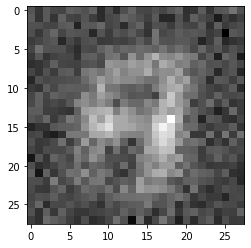

epoch : 162


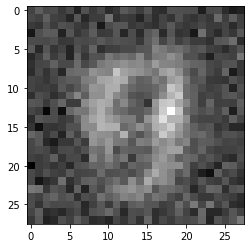

epoch : 163


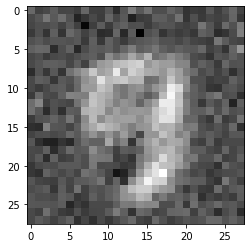

epoch : 164


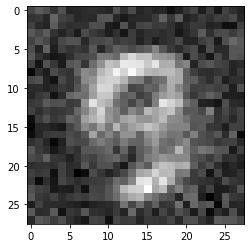

epoch : 165


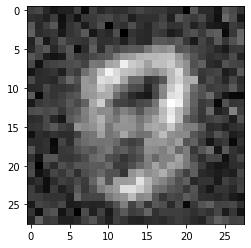

epoch : 166


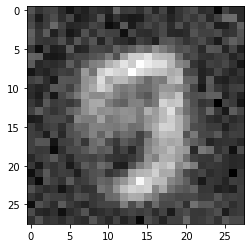

epoch : 167


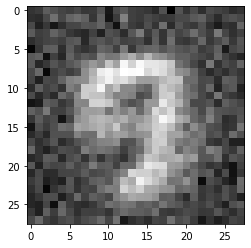

epoch : 168


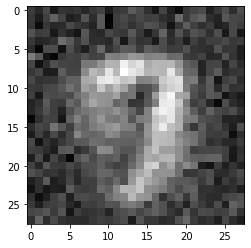

epoch : 169


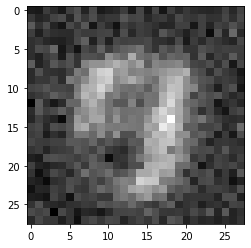

epoch : 170


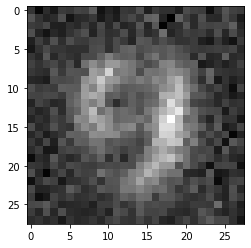

epoch : 171


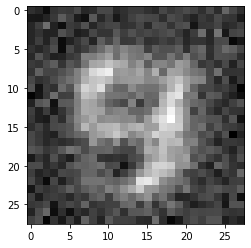

epoch : 172


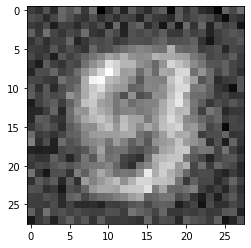

epoch : 173


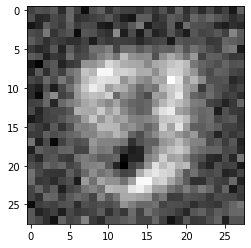

epoch : 174


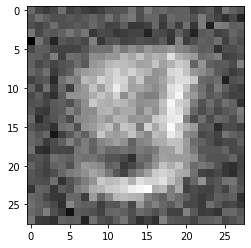

epoch : 175


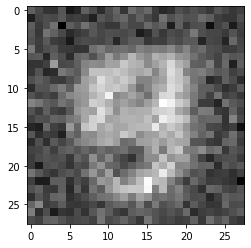

epoch : 176


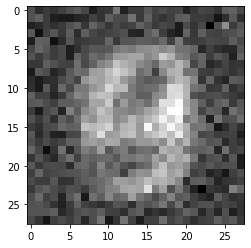

epoch : 177


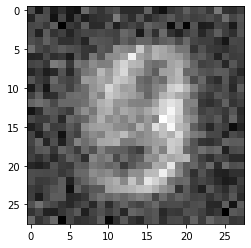

epoch : 178


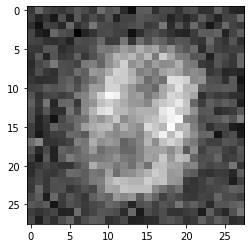

epoch : 179


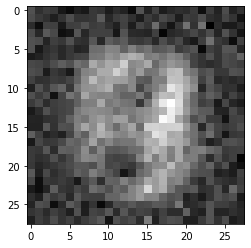

epoch : 180


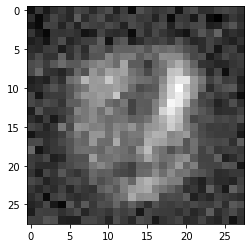

epoch : 181


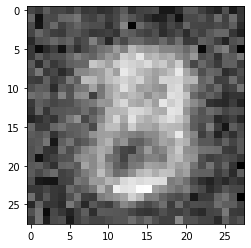

epoch : 182


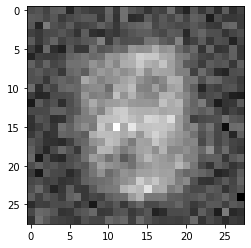

epoch : 183


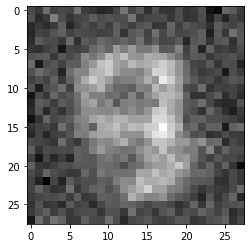

epoch : 184


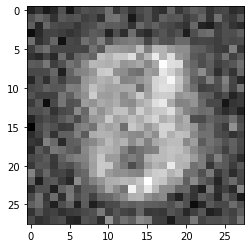

epoch : 185


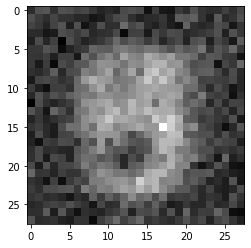

epoch : 186


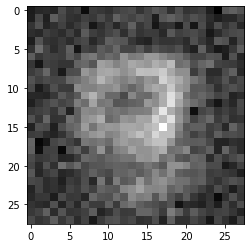

epoch : 187


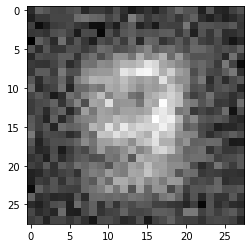

epoch : 188


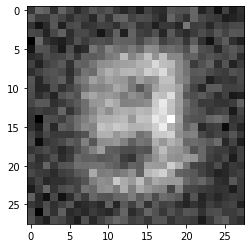

epoch : 189


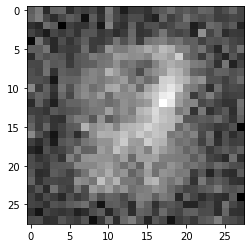

epoch : 190


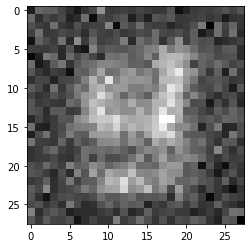

epoch : 191


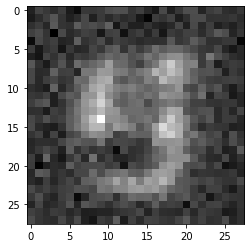

epoch : 192


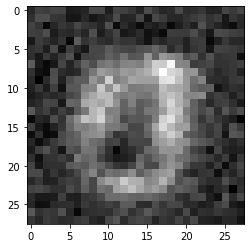

epoch : 193


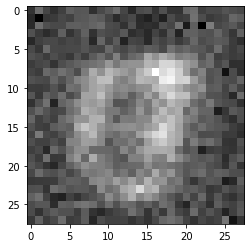

epoch : 194


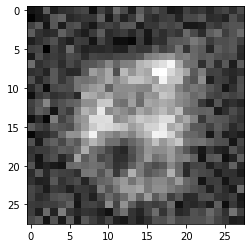

epoch : 195


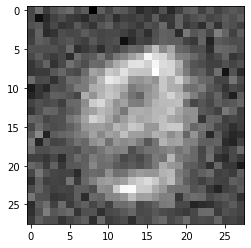

epoch : 196


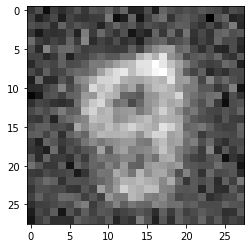

epoch : 197


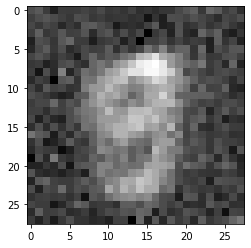

epoch : 198


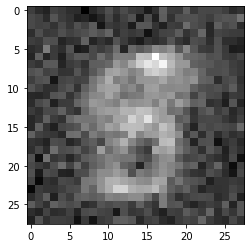

epoch : 199


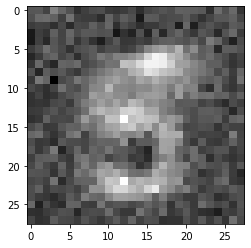

epoch : 200


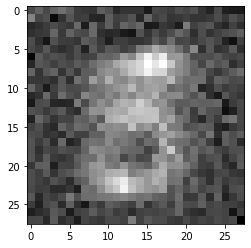

In [12]:
D_loss_history, G_loss_history = train(G, D, train_images, 
                                       EPOCHS=EPOCHS, 
                                       BATCH_SIZE = BATCH_SIZE, 
                                       NOISE_DIM= NOISE_DIM,
                                       show = True,
                                      )

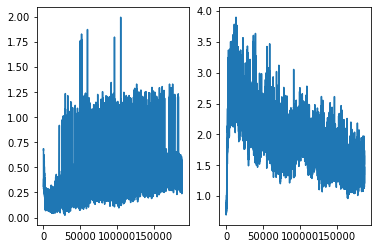

In [13]:
plt.subplot(1,2,1)
plt.plot(D_loss_history)

plt.subplot(1,2,2)
plt.plot(G_loss_history)

plt.show()

In [14]:
x = np.linspace(-2.0, 2.0, 20)
y = np.linspace(-2.0, 2.0, 20)

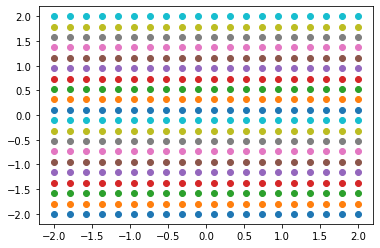

In [15]:
z = []
fig = plt.figure()

for x_ in x:
    for y_ in y:
        z.append((x_,y_))
        plt.scatter(x_,y_)
plt.show()

z = Tensor(z)

In [16]:
z.shape

torch.Size([400, 2])

In [17]:
out = G(z)
out.shape

torch.Size([400, 784])

In [18]:
out = out.detach().cpu().numpy().reshape(400,28,28)
print(out.shape)

(400, 28, 28)


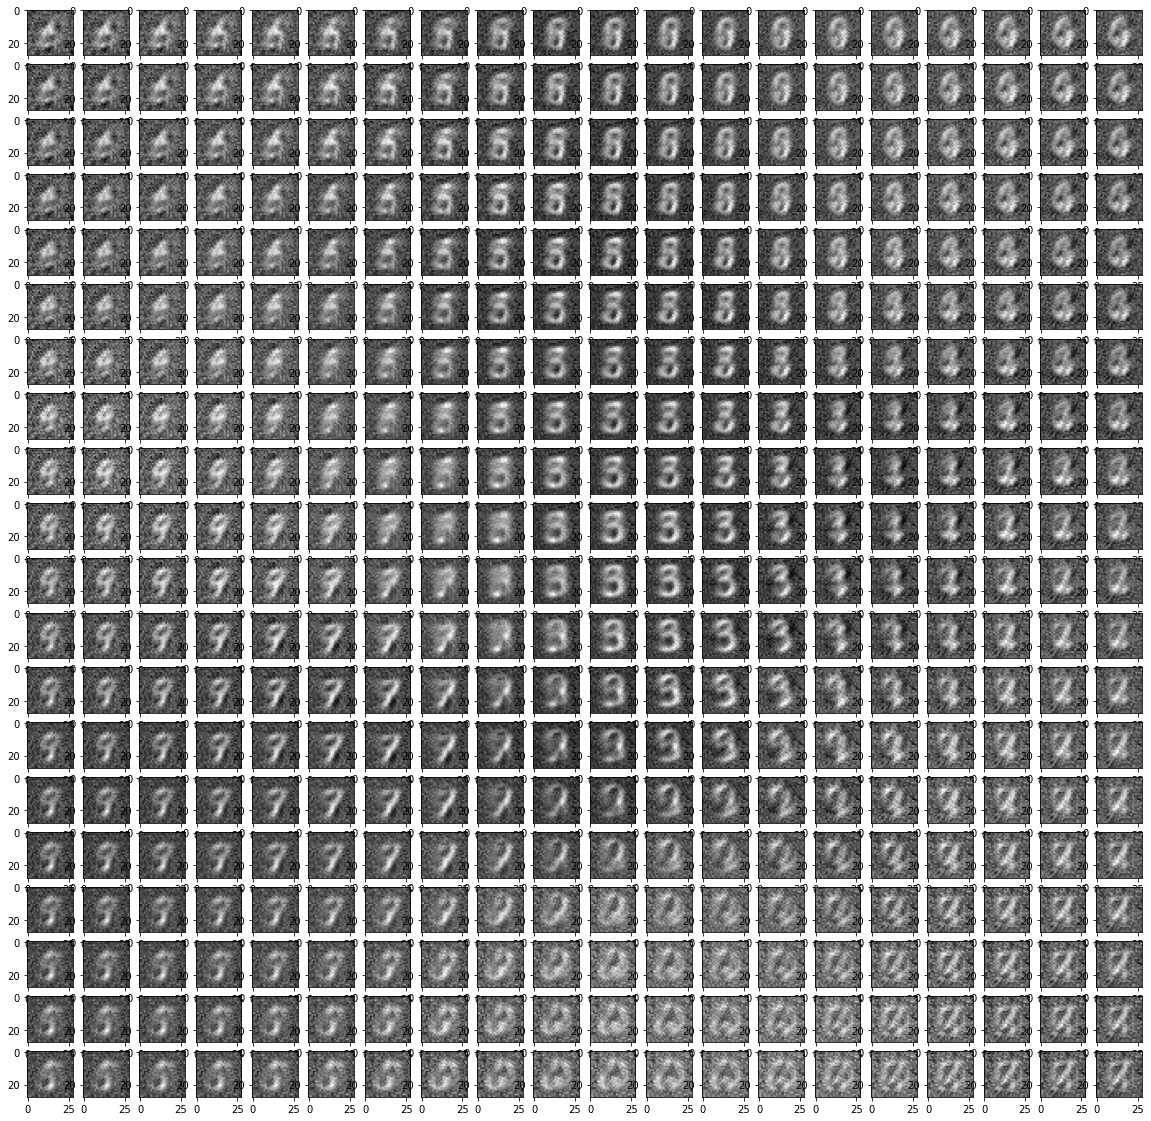

In [19]:
fig = plt.figure(figsize=(20,20))

for i in range(400):
    plt.subplot(20,20,i+1)
    plt.imshow(out[i], cmap='gray')
plt.show()